In [51]:
# Let's start with importing necessary libraries for prediction of House pricing data in Boston
import numpy as np
import pandas as pd
import pickle
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression
import statsmodels.api as sm 
boston=load_boston()




In [3]:
#finding the boston data dictionaru
boston.keys()
#boston.filename



dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [43]:
#introducting column names  and target as price
bos = pd.DataFrame(boston.data)
bos.columns=boston.feature_names
bos['PRICE']=boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
#checking the data size and shape and entries with any null values
bos.shape
bos.info()
bos.describe()
bos.columns
bos.dtypes
bos.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
PRICE      506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

C:\Users\HI\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


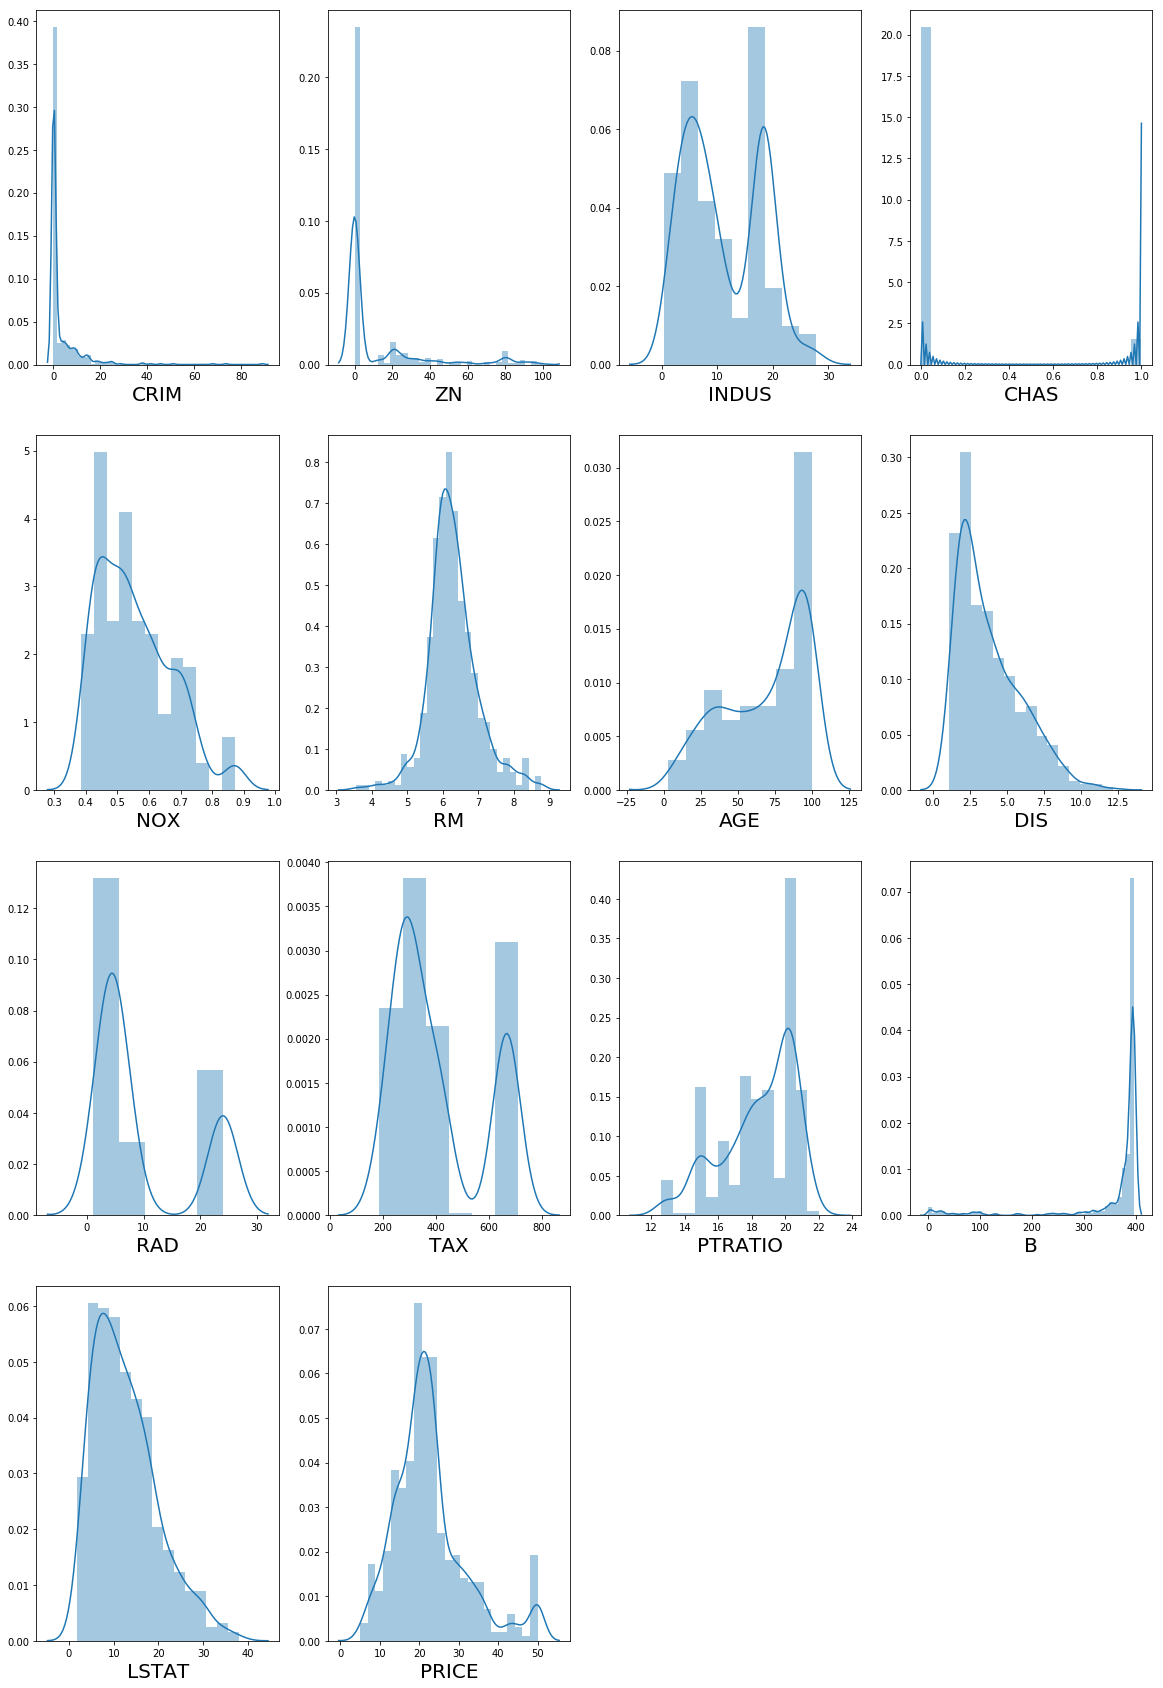

In [6]:
# figure the data in X columns is linear 
plt.figure(figsize=(20,30))
plotNo=1
subNo=1
for column in bos :
    if  plotNo<=16 :
        plt.subplot(4,4,plotNo)
        sns.distplot(bos[column])
        plt.xlabel(column,fontsize=20)
    plotNo+=1
   

    

    

In [21]:
y=bos['PRICE']
X=bos.drop(columns =['PRICE'])

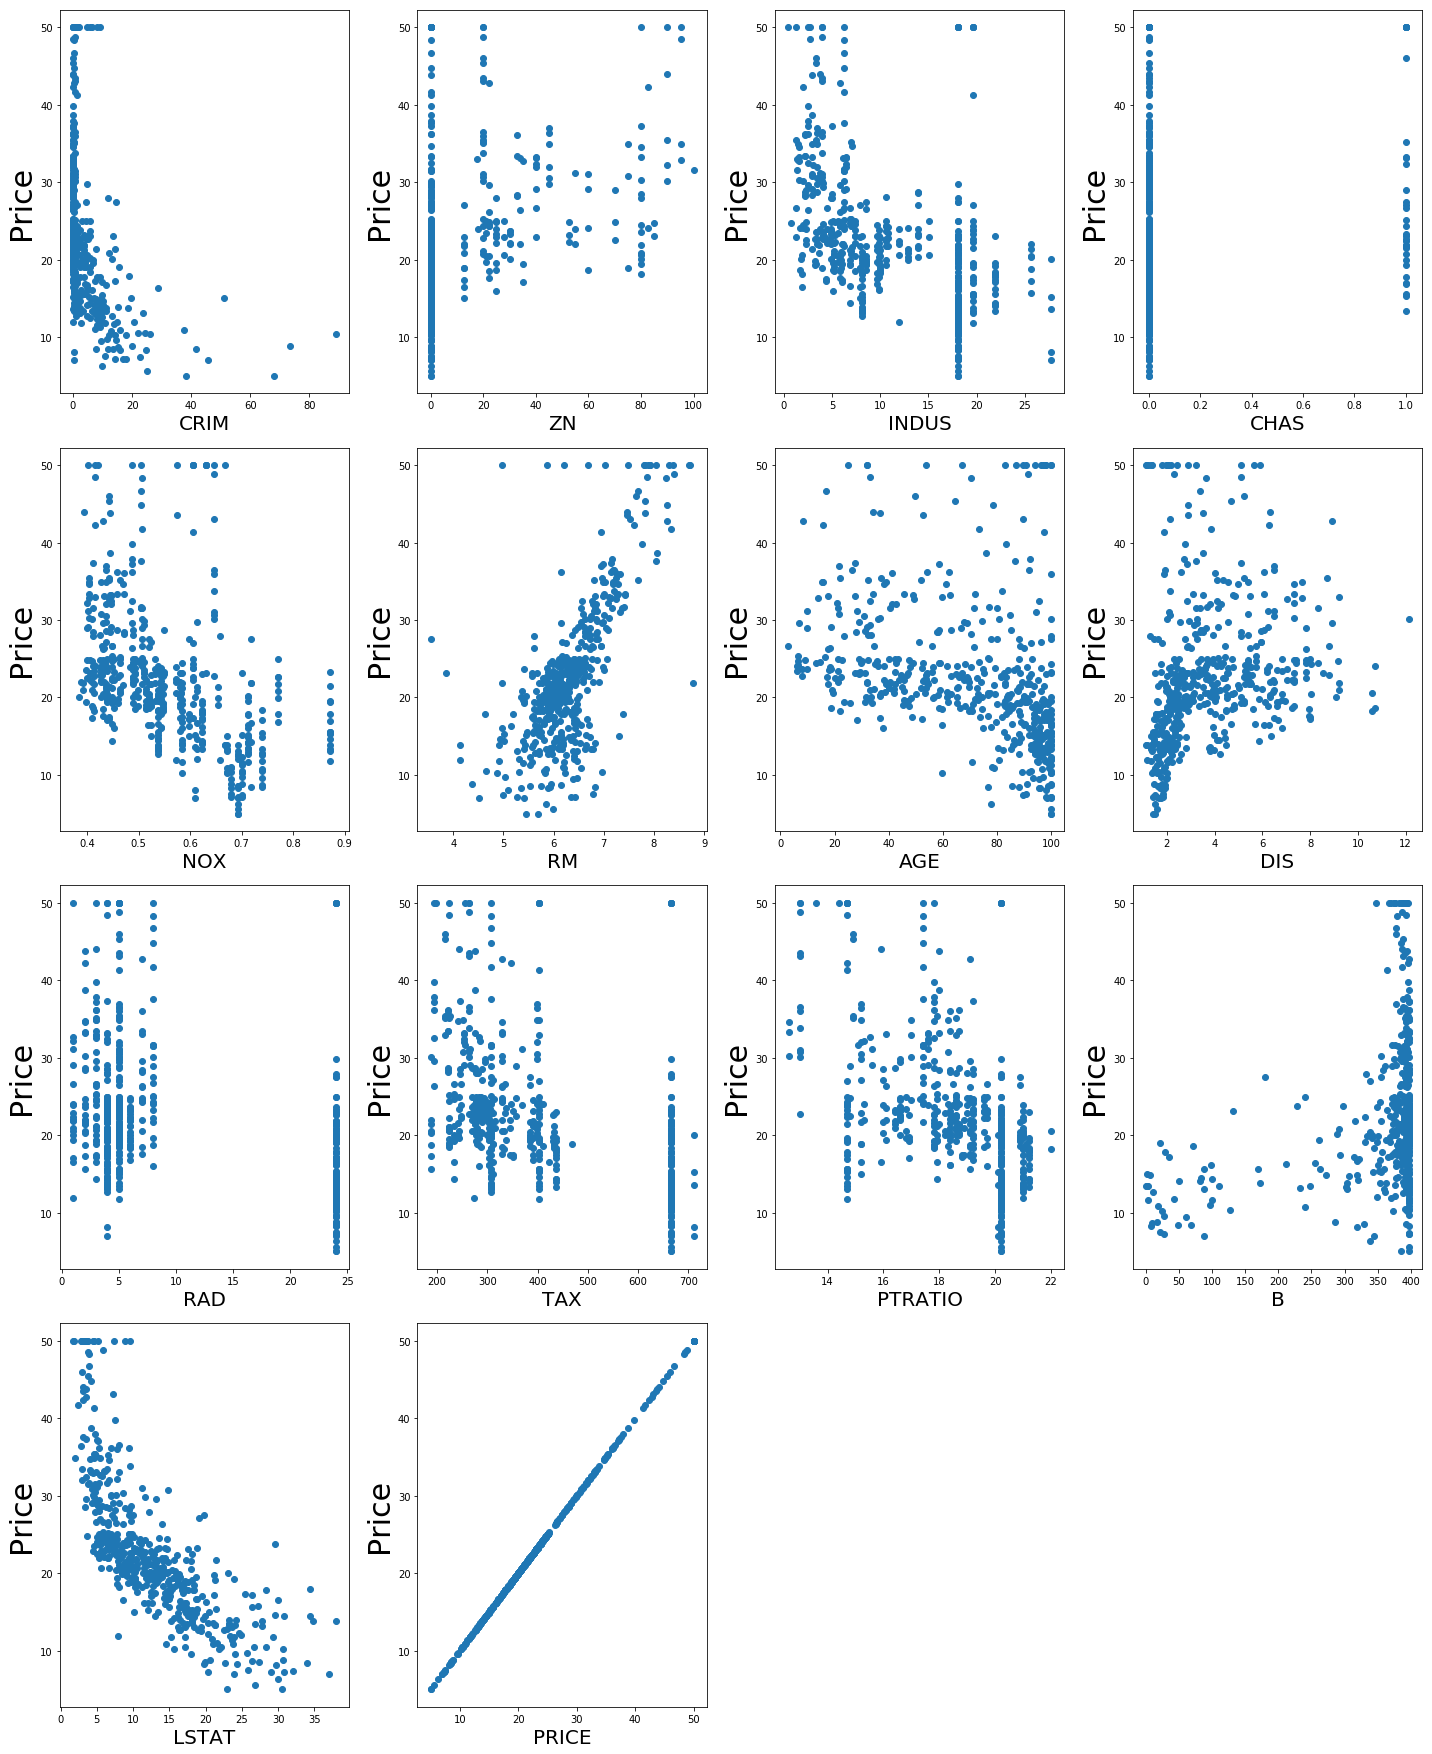

In [13]:
# checking the each X column independent variable has any relation to dependent variable y which is price
plt.figure(figsize=(20,30))
plotNo=1
subNo=1
for column in bos :
    if  plotNo<=16 :
        plt.subplot(5,4,plotNo)
        plt.scatter(bos[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel("Price", fontsize=30)
        
    plotNo+=1
plt.tight_layout()
   


In [13]:
corr=bos.corr()
corr.shape
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


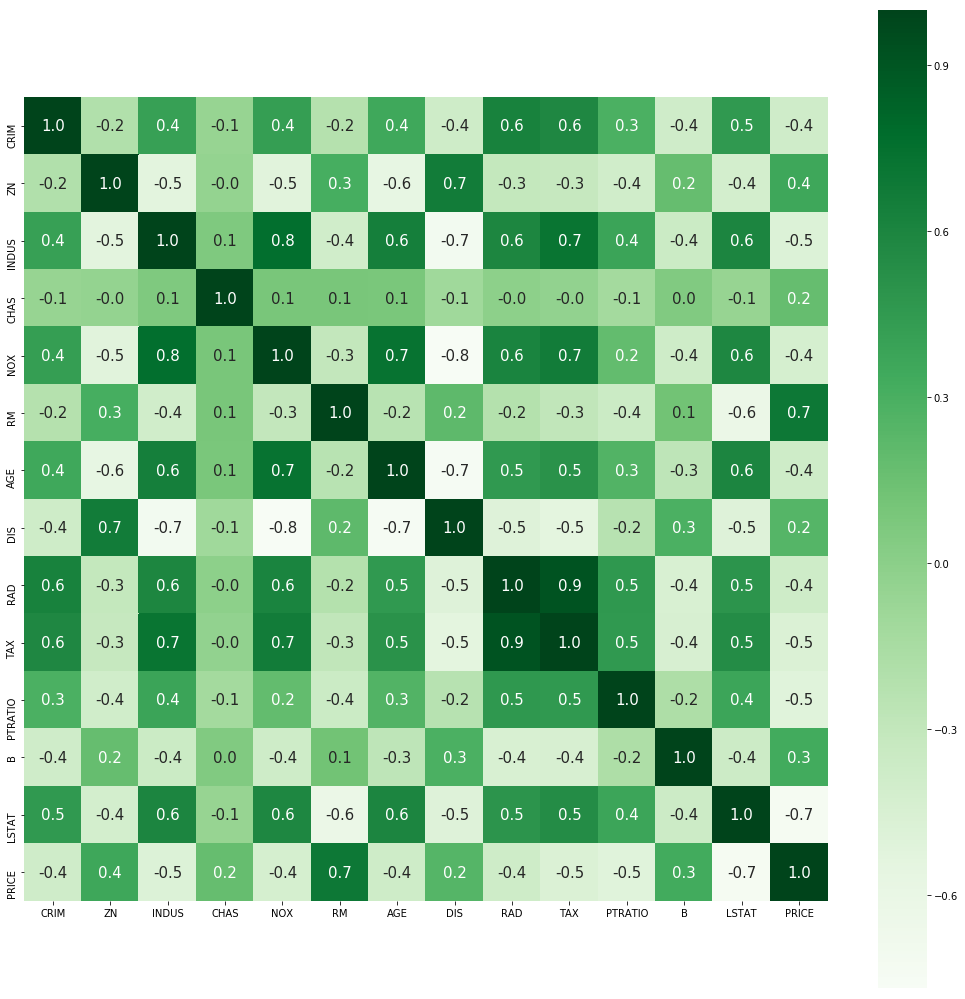

In [14]:
plt.figure(figsize=(18,18))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')
plt.show()

In [27]:
x_train,x_test,y_train,y_test=train_test_split(X_scaled, y, test_size=0.25,random_state=355)
regression=LinearRegression()
regression.fit(x_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [44]:
from sklearn.preprocessing import StandardScaler 
scaler =StandardScaler()
X_scaled = scaler.fit_transform(X)

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X_scaled

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
# we do not include categorical values for mulitcollinearity as they do not provide much information as numerical ones do
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = bos.columns
vif

ValueError: Length of values does not match length of index

In [48]:
regression.score(x_train,y_train)

0.730647531347494

In [47]:
regression.score(x_test,y_test)

0.7519030329262334

In [60]:
def adj_r2(x,y):
    r2 = regression.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [61]:
adj_r2(x_train,y_train)

0.7210541557516514

In [62]:
adj_r2(x_test,y_test)

0.7233609039708444

In [63]:
filename='house_price_model'
pickle.dump(regression,open(filename,'wb'))

In [65]:
load_model=pickle.load(open(filename,'rb'))
y_predict=load_model.predict(scaler.transform([[0.0532,12,1.31,1,0.438,7.57,61.2,2.09,1.0,236.0,13.3,326.90,2.98]]))
y_predict

array([44.63552545])

In [82]:
y_predict=load_model.predict(scaler.transform(x_test))
                       
#y_predict

# There is no overfitting in the model and adjusted r2 for train and test data is similar hence accept the model without any regularization
prediction for the given data is 44%

Lasso Regularization for cross validations

In [83]:
lasscv=LassoCV(alphas = None, cv = 10, max_iter=100000, normalize = True)
lasscv.fit(x_train,y_train)

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
    max_iter=100000, n_alphas=100, n_jobs=None, normalize=True,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

In [77]:
alpha=lasscv.alpha_
alpha

0.00033837642965584014

In [81]:
lass_reg=Lasso(alpha)
lass_reg.fit(x_train,y_train)
lass_reg.score(x_test,y_test)

0.7518957038694828

Ridge regularization

In [84]:
# Using Ridge regression model
# RidgeCV will return best alpha and coefficients after performing 10 cross validations. 
# We will pass an array of random numbers for ridgeCV to select best alpha from them
alphas=np.random.uniform(low=0,high=10, size=(50,))
ridgecv = RidgeCV(alphas = alphas,cv=10,normalize = True)
ridgecv.fit(x_train,y_train)
ridgecv.alpha_

C:\Users\HI\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.02550159750864145

In [85]:
ridge_model=Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.02550159750864145, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=False, random_state=None, solver='auto',
   tol=0.001)

In [86]:
ridge_model.score(x_test,y_test)

0.7518893513515487